<a href="https://colab.research.google.com/github/guilhsantos/Extracao_e_Tratamento_de_Dados_com_Python/blob/main/DataPreparationnapratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregando arquivo csv

In [3]:
from google.colab import files
upload = files.upload()

Saving Data - data (2).csv to Data - data (2).csv


# Etapa 01 - Inspecionando os Dados

In [18]:
df = pd.read_csv('Data - data (2).csv', sep=',')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


Descrição dos Dados

In [19]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Tipo dos Dados


In [20]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


# Etapa 02 - Valores faltantes na identificação do cliente


Verificação de valores nulos

In [21]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Remoção de valores nulos na Identificação dos clientes

In [22]:
df = df.dropna(subset=['CustomerID'])

# Preços unitários e quantidade de produtos iguais ou inferior a 0

Verificando se há preços unitários e quantidades menores ou iguais a zero

In [23]:
df[df['UnitPrice'] <= 0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [24]:
df[df['Quantity'] <= 0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


Filtrar apenas preços e quantidades válidos

In [25]:
df = df[df['UnitPrice'] > 0]
df = df[df['Quantity'] > 0]

# Etapa 04 - Linhas duplicadas

Verificando e removendo linhas duplicadas

In [26]:
df.duplicated().sum()
df = df.drop_duplicates()

# Etapa 05 - Ajustes nos tipos de dados

Convertendo tipos de dados

In [27]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Etapa 06 - Tratamento de outliers

Removendo outliers de quantidade e preços extremos

In [28]:
df = df[df['Quantity'] <= 10000]
df = df[df['UnitPrice'] <= 5000]

# Etapa 07 - Criando uma coluna adicional

In [ ]:
Criando coluna de preço total da compra

In [29]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Etapa 08 - Última Data

Calculando a data da última compra

In [30]:
last_date = df['InvoiceDate'].max()

# Etapa 09 - Plotando Gráficos

Top 10 países com maior valor em vendas

<ipython-input-35-ac7aebfb4026>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalPrice', y='Country', data=top_countries, palette='viridis')


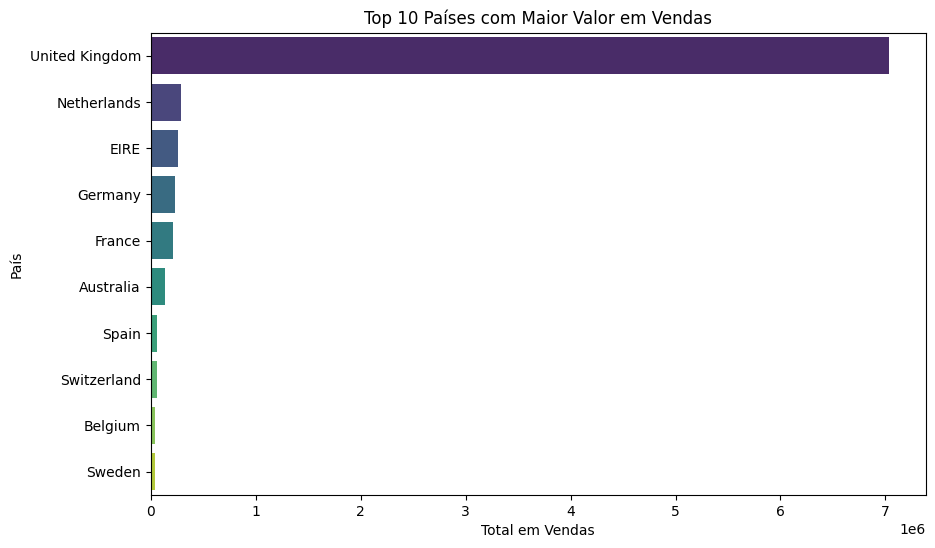

In [35]:
# Total de vendas por país
top_countries = df.groupby('Country')['TotalPrice'].sum().nlargest(10).reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPrice', y='Country', data=top_countries, palette='viridis')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('Total em Vendas')
plt.ylabel('País')
plt.show()

Top 10 produtos mais vendidos

<ipython-input-36-ed98b9e88e34>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Description', data=top_products, palette='viridis')


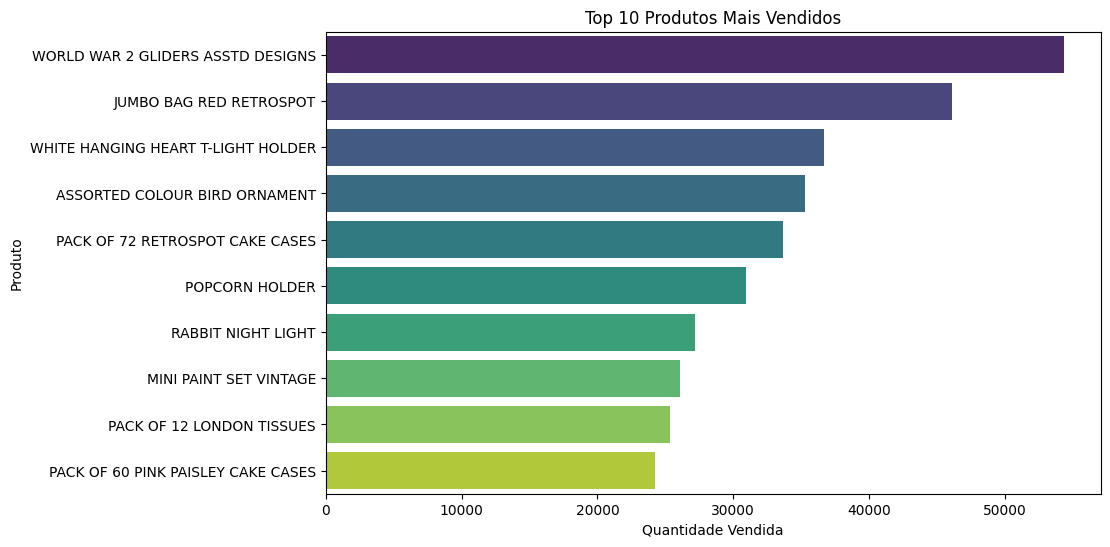

In [36]:
# Total de quantidade vendida por produto
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Description', data=top_products, palette='viridis')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.show()

Valor de venda total por mês

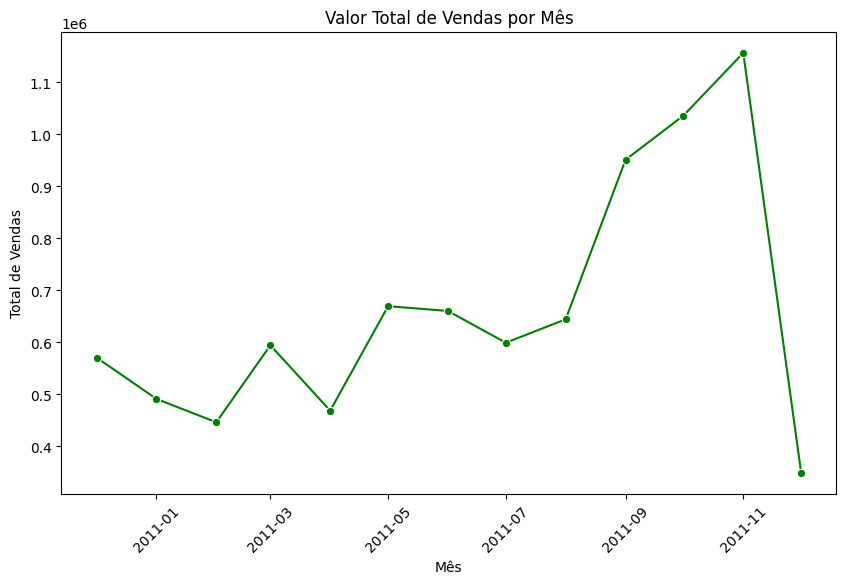

In [44]:
# Criar coluna de ano e mês
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Total de vendas por mês
sales_by_month = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()

# Converter YearMonth para datetime
sales_by_month['YearMonth'] = sales_by_month['YearMonth'].dt.to_timestamp()

# Gráfico de linha corrigido
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='TotalPrice', data=sales_by_month, marker='o', color='green')
plt.title('Valor Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()

Valor de venda total por mês e por país (top 10 países)

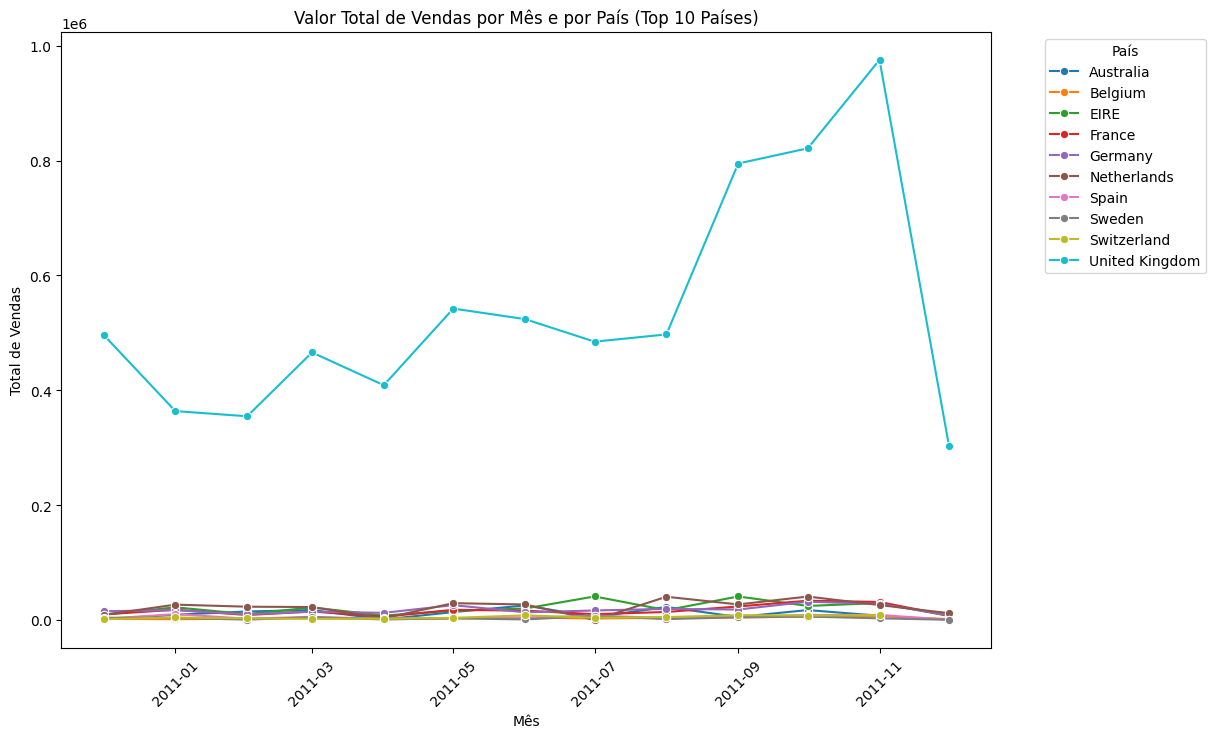

In [46]:
# Filtrar apenas os top 10 países
top_10_countries = df['Country'].isin(top_countries['Country'])

# Total de vendas por mês e país (top 10 países)
sales_by_month_country = df[top_10_countries].groupby(['YearMonth', 'Country'])['TotalPrice'].sum().reset_index()

# Converter YearMonth para datetime se ainda não foi feito
sales_by_month_country['YearMonth'] = sales_by_month_country['YearMonth'].dt.to_timestamp()

# Gráfico de linha
plt.figure(figsize=(12, 8))
sns.lineplot(x='YearMonth', y='TotalPrice', hue='Country', data=sales_by_month_country, marker='o')
plt.title('Valor Total de Vendas por Mês e por País (Top 10 Países)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Etapa 10 - Cálculo do RFM

Recência: Tempo desde a última compra

In [51]:
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'mean'
}).reset_index()
rfm_df.columns = ['CustomerID', 'Recencia', 'Frequencia', 'Ticket_Medio']


In [52]:
rfm_df.head()

,CustomerID,Recencia,Frequencia,Ticket_Medio
0,12347,1,182,23.681319
1,12348,74,31,57.975484
2,12349,18,73,24.076027
3,12350,309,17,19.670588
4,12352,35,85,29.482824


Transformando e salvando a tabela RFM em csv

In [53]:
# Caminho e nome do arquivo CSV de saída
output_csv_path = 'e-commerce_RFM.csv'

# Salvar a tabela sales_by_month_country em um arquivo CSV
rfm_df.to_csv(output_csv_path, index=False)

print(f"Arquivo CSV salvo com sucesso em: {output_csv_path}")

Arquivo CSV salvo com sucesso em: e-commerce_RFM.csv
